In [3]:
!pip install quandl

  Stored in directory: /home/nbuser/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built inflection
You should consider upgrading via the 'pip install --upgrade pip' command.


In [16]:
import pandas as pd
import quandl
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
quandl.ApiConfig.api_key = "Pt9iKjPbH1NzQe2xBrxp"

In [6]:
mydata = quandl.get(["FRED/GDPC1","FRED/UNRATE","FRED/CPIAUCSL"], start_date="1979-09-01", collapse="quarterly")
mydata

,FRED/GDPC1 - Value,FRED/UNRATE - Value,FRED/CPIAUCSL - Value
Date,,,
1979-09-30,NaN,5.9,74.400
1979-12-31,6816.203,6.0,76.900
1980-03-31,6837.641,6.3,80.100
1980-06-30,6696.753,7.6,82.500
1980-09-30,6688.794,7.5,83.900
1980-12-31,6813.535,7.2,86.400
1981-03-31,6947.042,7.4,88.600
1981-06-30,6895.559,7.5,90.500
1981-09-30,6978.135,7.6,93.100


In [9]:
#Total rows
len(mydata.axes[0])

160

In [10]:
#Total Columns
len(mydata.axes[1])

3

In [13]:
mydata.columns.values

array(['GDP', 'FRED/UNRATE - Value', 'FRED/CPIAUCSL - Value'],
      dtype=object)

In [14]:
mydata = mydata.rename(columns = {'FRED/GDPC1 - Value':'GDP'})
mydata = mydata.rename(columns = {'FRED/UNRATE - Value':'UNRATE'})
mydata = mydata.rename(columns = {'FRED/CPIAUCSL - Value':'CPIAUCSL'})
mydata.columns

Index(['GDP', 'UNRATE', 'CPIAUCSL'], dtype='object')

In [30]:
#mydata.isnull()
#mydata.isnull().any()
#mydata.isnull().any().sum()
#mydata.isnull().T.any()
mydata.isnull().T.any().sum()

2

In [31]:
mydata['GDP'] = mydata['GDP'].pct_change()
mydata['UNRATE']=mydata['UNRATE'].pct_change().shift(1)
mydata['CPIAUCSL']=mydata['CPIAUCSL'].pct_change().shift(1)


In [32]:
mydata.head()

,GDP,UNRATE,CPIAUCSL
Date,,,
1979-09-30,NaN,NaN,NaN
1979-12-31,NaN,NaN,NaN
1980-03-31,0.003145,0.016949,0.033602
1980-06-30,-0.020605,0.050000,0.041612
1980-09-30,-0.001188,0.206349,0.029963


In [45]:
mydata.dropna()

,GDP,UNRATE,CPIAUCSL
Date,,,
1980-03-31,0.003145,0.016949,0.033602
1980-06-30,-0.020605,0.050000,0.041612
1980-09-30,-0.001188,0.206349,0.029963
1980-12-31,0.018649,-0.013158,0.016970
1981-03-31,0.019594,-0.040000,0.029797
1981-06-30,-0.007411,0.027778,0.025463
1981-09-30,0.011975,0.013514,0.021445
1981-12-31,-0.010895,0.013333,0.028729
1982-03-31,-0.015535,0.118421,0.010741


In [46]:
mydata.tail()

,GDP,UNRATE,CPIAUCSL
Date,,,
2018-06-30,0.010239,-0.024390,0.006442
2018-09-30,0.008287,0.000000,0.006557
2018-12-31,0.005373,-0.075000,0.003488
2019-03-31,0.007581,0.054054,0.002829
2019-06-30,0.000000,-0.025641,0.005639


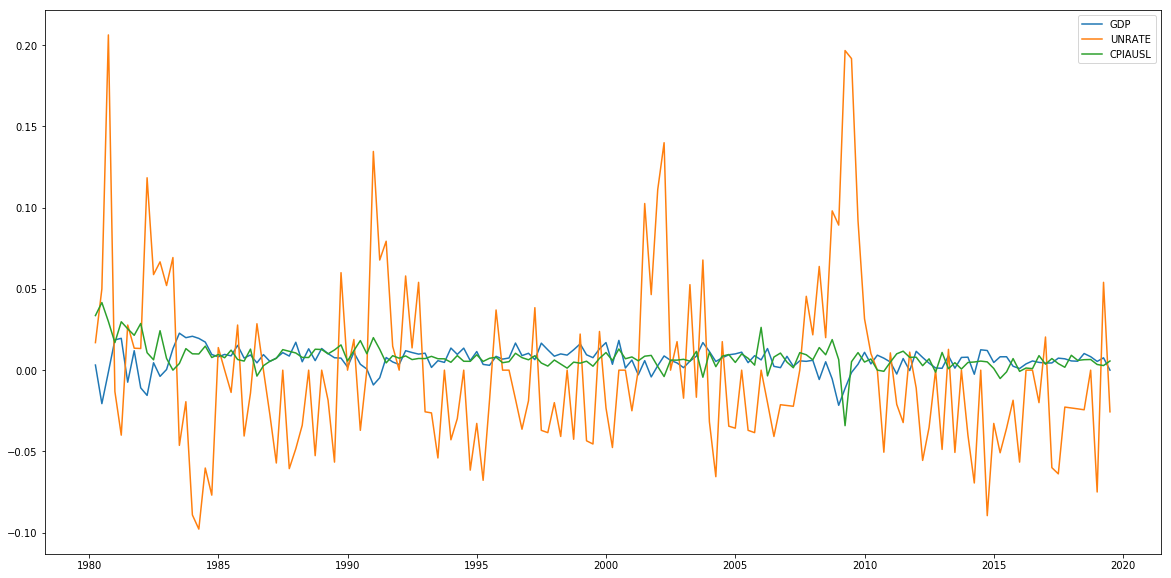

In [47]:
plt.figure(figsize=(20,10))
plt.plot(mydata.index, mydata['GDP'], label ='GDP')
plt.plot(mydata.index, mydata['UNRATE'], label = 'UNRATE')
plt.plot(mydata.index, mydata['CPIAUCSL'], label = 'CPIAUSL')
plt.legend()
plt.show()
